#### Step 1: Webscraping

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

import time
from getpass import getpass
import time
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
import seaborn as sns
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.edge.options import Options
from selenium.webdriver.edge.service import Service
import pandas as pd
import re
options = Options()
options.add_argument("--headless")

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pickle
from datetime import datetime

### Webscraping Gocar website

In [96]:
car_dict2 = {}
bg_cars = pd.DataFrame()


def gocar(): #fazer depender nº d paginas
    
        car_index2 = 0
        url = "https://gocar.be/en/search?page=1&vehicle_type=car~van&condition=second%20hand"
        driver = webdriver.Edge(service=Service("msedgedriver.exe"))
        driver.get(url)
        driver.maximize_window()
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        products2=soup.find_all("div", attrs ={"class":"card border-0 shadow vehicle-item"})

        #cookies agreement - sometimes appear - not always
        try:
                agree_button = driver.find_element(By.ID, "didomi-notice-agree-button")
                agree_button.click()
        except:
                pass
        for i in range(21): #10 paginas
                try: 
                    html = driver.page_source
                    soup = BeautifulSoup(html, 'html.parser')
                    products2=soup.find_all("div", attrs ={"class":"card border-0 shadow vehicle-item"})
                    for car in products2:
                        make_model2=car.find_all("span", attrs ={"class":"d-block m-0 text-truncate font-weight-bold text-gray-700"})[0].get_text().strip()
                        price2=car.find_all("div", attrs = {"class":"d-flex align-items-center col-12 p-0 mb-1"})[0].get_text().strip()
                        registration2= car.find_all("span", attrs = {"attribute-item text-sm"})[0].get_text().strip()
                        mileage = car.find_all("span", attrs = {"attribute-item text-sm"})[2].get_text().strip()
                        website = car.find("a")["href"]
                        fuel = car.find_all("span", attrs = {"attribute-item text-sm"})[1].get_text().strip()
                        
                        car_dict2[car_index2] = {"make & model":make_model2,
                                               "price" : price2,"website":website,
                                                 "mileage":mileage, "fuel": fuel,
                                                 "registration": registration2}
                   
                        car_index2 += 1
                    next_page = driver.find_element(By.CLASS_NAME, "ais-Pagination-item.ais-Pagination-item--nextPage")
                    driver.execute_script("arguments[0].scrollIntoView();", next_page)
                    time.sleep(1)
                    next_page.click()
                    print("page changed")

                except:
                        print("failed")
                        
            

In [97]:
driver = webdriver.Edge()
driver.maximize_window()

def stand_virtual():
    dfs=[]

    for i in range(1, 501):
        url = f"https://www.standvirtual.com/carros?page={i}"
        driver.get(url)
        time.sleep(2)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        products=soup.find_all("article", attrs ={"class":"ooa-1t80gpj ev7e6t818"}) 

        car_dict = {}
        car_index = 0

        for car in products:
            make_model= car.find_all("h1", attrs ={"class":"ev7e6t89 ooa-1xvnx1e er34gjf0"})[0].get_text().strip()
            price =  car.find_all("h3", attrs = {"class":"ev7e6t82 ooa-bz4efo er34gjf0"})[0].get_text().strip()
            registration = car.find_all("dd", attrs = {"data-parameter":"first_registration_year"})[0].get_text().strip()
            mileage=car.find_all("dd", attrs = {"ooa-1smopdt ev7e6t85"})[0].get_text().strip()
            fuel=car.find_all("dd", attrs = {"ooa-1smopdt ev7e6t85"})[1].get_text().strip()
            website=car.find("a")["href"]


            car_dict[car_index] = {"make & model":make_model,"fuel":fuel,
                                   "price" : price, "mileage":mileage,
                                     "registration": registration, "website":website}

            car_index += 1

        virtual=pd.DataFrame.from_dict(car_dict, orient="index")
        virtual["country"]="Portugal"

        #dfs.append(virtual)
        
    return pd.concat(dfs)

    driver.quit()

The msedgedriver version (119.0.2151.97) detected in PATH at c:\Users\Elsio Miranda\Downloads\msedgedriver.exe might not be compatible with the detected MicrosoftEdge version (120.0.2210.61); currently, msedgedriver 120.0.2210.61 is recommended for MicrosoftEdge 120.*, so it is advised to delete the driver in PATH and retry


In [98]:
gocar()

failed
page changed
page changed
page changed
page changed
page changed
page changed
page changed
page changed
page changed
page changed
page changed
page changed
page changed
page changed
page changed
page changed
page changed
page changed
page changed
page changed


In [99]:
df2=pd.DataFrame.from_dict(car_dict2, orient="index")
df2["country"]="Belgium"
df2

,make & model,price,website,mileage,fuel,registration,country
0,MERCEDES GLE COUPE,47.500 €,https://gocar.be/en/cars/mercedes/gle-coupe/gl...,113.500 km,Petrol,04/2017,Belgium
1,RENAULT MEGANE,3.300 €,https://gocar.be/en/cars/renault/megane/n-a/id...,232.000 km,Diesel,01/2012,Belgium
2,PEUGEOT 3008,4.400 €,https://gocar.be/en/cars/peugeot/3008/premium-...,255.504 km,Diesel,02/2011,Belgium
3,RENAULT CLIO,3.000 €,https://gocar.be/en/cars/renault/clio/authenti...,119.355 km,Petrol,10/2005,Belgium
4,MAZDA B2500,5.000 €,https://gocar.be/en/cars/mazda/b-2500/115000km...,115.000 km,Diesel,08/2002,Belgium
...,...,...,...,...,...,...,...
1045,CITROEN C5 AIRCROSS,20.700 €,https://gocar.be/en/cars/citroen/c5-aircross/1...,58.000 km,Petrol,11/2019,Belgium
1046,BMW X5,54.900 €,https://gocar.be/en/cars/bmw/x5/30as-xdrive45e...,130.334 km,Hybrid - Petrol,12/2019,Belgium
1047,POLESTAR POLESTAR 2,46.995 €,https://gocar.be/en/cars/polestar/2/n-a/id/418...,32.689 km,Electric,01/2022,Belgium
1048,SKODA OCTAVIA COMBI,12.990 €,https://gocar.be/en/cars/skoda/octavia-combi/1...,157.500 km,Diesel,12/2016,Belgium


In [100]:
print(df2.drop_duplicates(inplace=True))
print(df2.shape)
df2.to_csv("gocar_cars.csv")

None
(750, 7)


the gocar site did not allow us to iterate over pages through the url, thereofre we had to suse selinium mouse actions to click nect on the site. Furthermore the site would give us more duplicstes the more pages we iteraated over. optimal number seemed to be around 20 pages more than that we would get gewere results. For purpose of this project we saved to a cvs and will be working from the cvs. Long term for the tool however, would work from the dataframe as this continues to be automatically updated with information in the site

### Webscraping Stand Virtual Website

In [ ]:
options = Options()
options.add_argument("--headless")
url = "https://www.standvirtual.com/carros"
response=requests.get(url)
response

In [10]:
svirtual_df=stand_virtual()

In [ ]:
svirtual_df.duplicated().sum()

1026

In [ ]:
svirtual_df.to_csv("stand_virtual.csv")

In [7]:
svirtual_df.info()

NameError: name 'svirtual_df' is not defined

We imported the required libraries. We also scraped car information from stand virtual website and saved it to a dataframe. We then proceeded to save it to a csv.

### Data Wrangling

#### Cleaning gocar dataset

In [8]:
belgium_cars=pd.read_csv("gocar_cars.csv")

In [9]:
belgium_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    900 non-null    int64 
 1   make & model  900 non-null    object
 2   price         900 non-null    object
 3   website       900 non-null    object
 4   mileage       900 non-null    object
 5   fuel          900 non-null    object
 6   registration  900 non-null    object
 7   country       900 non-null    object
dtypes: int64(1), object(7)
memory usage: 56.4+ KB


In [10]:
belgium_cars.drop(["Unnamed: 0"],axis=1, inplace=True)

In [11]:
belgium_cars['price'] = (
    pd.to_numeric(belgium_cars['price'].replace('[^\d.]', '', regex=True), errors='coerce')
    .replace(0, float('nan'))  
    .astype(float)
    *1000 
)

In [12]:
belgium_cars['price'] = pd.to_numeric(belgium_cars['price'], errors='coerce').fillna(0).astype(int)

In [13]:
belgium_cars['mileage'] = belgium_cars['mileage'].str.replace('.', '')

In [14]:
belgium_cars['mileage'] = belgium_cars['mileage'].str.replace('km', '')

In [15]:
belgium_cars['mileage'] = belgium_cars['mileage'].str.replace(' ', '')

In [16]:
mileage_values = belgium_cars['mileage'].astype(str)

special_characters_present = any(re.search(r'\D', value) for value in mileage_values)

print("Special characters present in 'mileage' column:", special_characters_present)

Special characters present in 'mileage' column: False


In [17]:
belgium_cars['mileage'] = belgium_cars['mileage'].astype(int)

In [18]:
belgium_cars['registration'] = pd.to_datetime(belgium_cars['registration'], format='%m/%Y').dt.year.astype(int)

#### Cleaning stand virtual dataset

In [19]:
port_cars=pd.read_csv("stand_virtual.csv")

In [20]:
port_cars.duplicated().sum()

0

In [21]:
print(port_cars.drop_duplicates(inplace=True))
print(port_cars.shape)

None
(15936, 8)


In [22]:
port_cars.drop(["Unnamed: 0"],axis=1, inplace=True)

In [23]:
port_cars['make & model'] = port_cars['make & model'].str.rsplit(' ', n=3).str[:-3].str.join(' ')

In [24]:
port_cars["registration"] = pd.to_numeric(port_cars["registration"], errors='coerce').astype(int)

In [25]:
port_cars["price"]=port_cars["price"].replace('[^\\d.]', '', regex=True)

In [26]:
port_cars["price"]=port_cars["price"].astype(int)

In [27]:
port_cars["mileage"] = port_cars['mileage'].str.replace('km', '')

In [28]:
port_cars["mileage"] = port_cars['mileage'].str.replace(' ', '')

In [29]:
mileage_values = port_cars['mileage'].astype(str)
special_characters_present = any(re.search(r'\D', value) for value in mileage_values)
print("Special characters present in 'mileage' column:", special_characters_present)

Special characters present in 'mileage' column: True


In [30]:
rows_with_special_characters = port_cars[mileage_values.str.contains(r'\D')]
print("Rows with special characters in 'mileage' column:")
print(rows_with_special_characters)

Rows with special characters in 'mileage' column:
                 make & model        fuel  price    mileage  registration  \
2167                           Automática  50751  Eléctrico          2023   
4549                    Skoda  Automática  44990  Eléctrico          2023   
4550              Skoda Enyaq  Automática  50990  Eléctrico          2023   
9370              Ford Fiesta      Manual  23659   Gasolina          2023   
9371            Hyundai Ioniq  Automática  59391  Eléctrico          2023   
...                       ...         ...    ...        ...           ...   
10042                    Fiat      Manual  20519   Gasolina          2023   
10189         Volvo XC 40 1.5  Automática  42093   Gasolina          2023   
11230           Mercedes-Benz  Automática  92500  Eléctrico          2023   
12591  Mazda MX-30 e-SKYACTIV  Automática  44715  Eléctrico          2023   
12592                          Automática  37981  Eléctrico          2023   

                         

In [31]:
mileage_values = port_cars['mileage'].astype(str)
rows_with_special_characters = port_cars[mileage_values.str.contains(r'\D')]
port_cars.drop(rows_with_special_characters.index, inplace=True)
port_cars.reset_index(drop=True, inplace=True)

In [32]:
port_cars["mileage"]=port_cars['mileage'].astype(int)

In [33]:
port_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15795 entries, 0 to 15794
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make & model  15795 non-null  object
 1   fuel          15795 non-null  object
 2   price         15795 non-null  int32 
 3   mileage       15795 non-null  int32 
 4   registration  15795 non-null  int32 
 5   website       15795 non-null  object
 6   country       15795 non-null  object
dtypes: int32(3), object(4)
memory usage: 678.8+ KB


#### Concating two datasets

In [34]:
car_df=pd.concat([port_cars,belgium_cars], ignore_index=True)
car_df

,make & model,fuel,price,mileage,registration,website,country
0,BMW 120 d,Diesel,16900,175500,2011,https://www.standvirtual.com/carros/anuncio/bm...,Portugal
1,Renault Scénic 1.5,Diesel,12990,167000,2016,https://www.standvirtual.com/carros/anuncio/re...,Portugal
2,Peugeot 3008 2.0 BlueHDi GT,Diesel,29480,62000,2018,https://www.standvirtual.com/carros/anuncio/pe...,Portugal
3,Porsche Cayenne,Diesel,32850,210000,2012,https://www.standvirtual.com/carros/anuncio/po...,Portugal
4,Mercedes-Benz C 220 (BlueTEC) d,Diesel,27900,179000,2017,https://www.standvirtual.com/carros/anuncio/me...,Portugal
...,...,...,...,...,...,...,...
16690,BMW SERIE 8,Petrol,48799,167659,2019,https://gocar.be/en/cars/bmw/840/840ixas-gran-...,Belgium
16691,MINI MINI,Petrol,25995,16115,2023,https://gocar.be/en/cars/mini/cooper/hud-camer...,Belgium
16692,MERCEDES CLASSE C,Petrol,24499,34000,2018,https://gocar.be/en/cars/mercedes/c-160/amg-bu...,Belgium
16693,RENAULT KOLEOS,Petrol,25499,13000,2022,https://gocar.be/en/cars/renault/koleos/133-tc...,Belgium


#### Cleaning of new_df dataset

In [35]:
car_df[["make & model", "country", "fuel"]] = car_df[["make & model", "country", "fuel"]].apply(lambda x: x.str.lower())

In [36]:

replacement_mapping = {
    'gasolina': 'petrol',
    'eléctrico': 'electric',
    'híbrido (gasolina)': 'hybrid petrol',
    'hybrid - petrol': 'hybrid petrol',
    'híbrido (diesel)': 'hybrid diesel',
    'hybrid - diesel': 'hybrid diesel',
    'gpl': 'lpg',
}

car_df['fuel'] = car_df['fuel'].replace(replacement_mapping)

unwanted_fuels = ['gnc', 'cng', 'hybrid']
car_df = car_df[~car_df['fuel'].str.contains('|'.join(unwanted_fuels))]

In [37]:
car_df.duplicated().sum()

950

In [38]:
car_df.drop_duplicates(inplace=True)


C:\Users\Elsio Miranda\AppData\Local\Temp\ipykernel_1244\2101955982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df.drop_duplicates(inplace=True)


In [39]:
car_df.describe()

,price,mileage,registration
count,14692.000000,14692.000000,14692.000000
mean,25217.829363,104066.533624,2016.561462
std,25723.316791,74493.561303,6.256566
min,0.000000,1.000000,1947.000000
25%,13990.000000,44589.000000,2015.000000
50%,19750.000000,94506.500000,2018.000000
75%,27950.000000,148000.000000,2020.000000
max,859900.000000,619000.000000,2023.000000


In [40]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14692 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make & model  14692 non-null  object
 1   fuel          14692 non-null  object
 2   price         14692 non-null  int32 
 3   mileage       14692 non-null  int32 
 4   registration  14692 non-null  int32 
 5   website       14692 non-null  object
 6   country       14692 non-null  object
dtypes: int32(3), object(4)
memory usage: 746.1+ KB


In [41]:
car_df.to_csv("car_comparison.csv")

### Visualization

C:\Users\Elsio Miranda\AppData\Local\Temp\ipykernel_1244\3174803728.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_df.price)
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating i

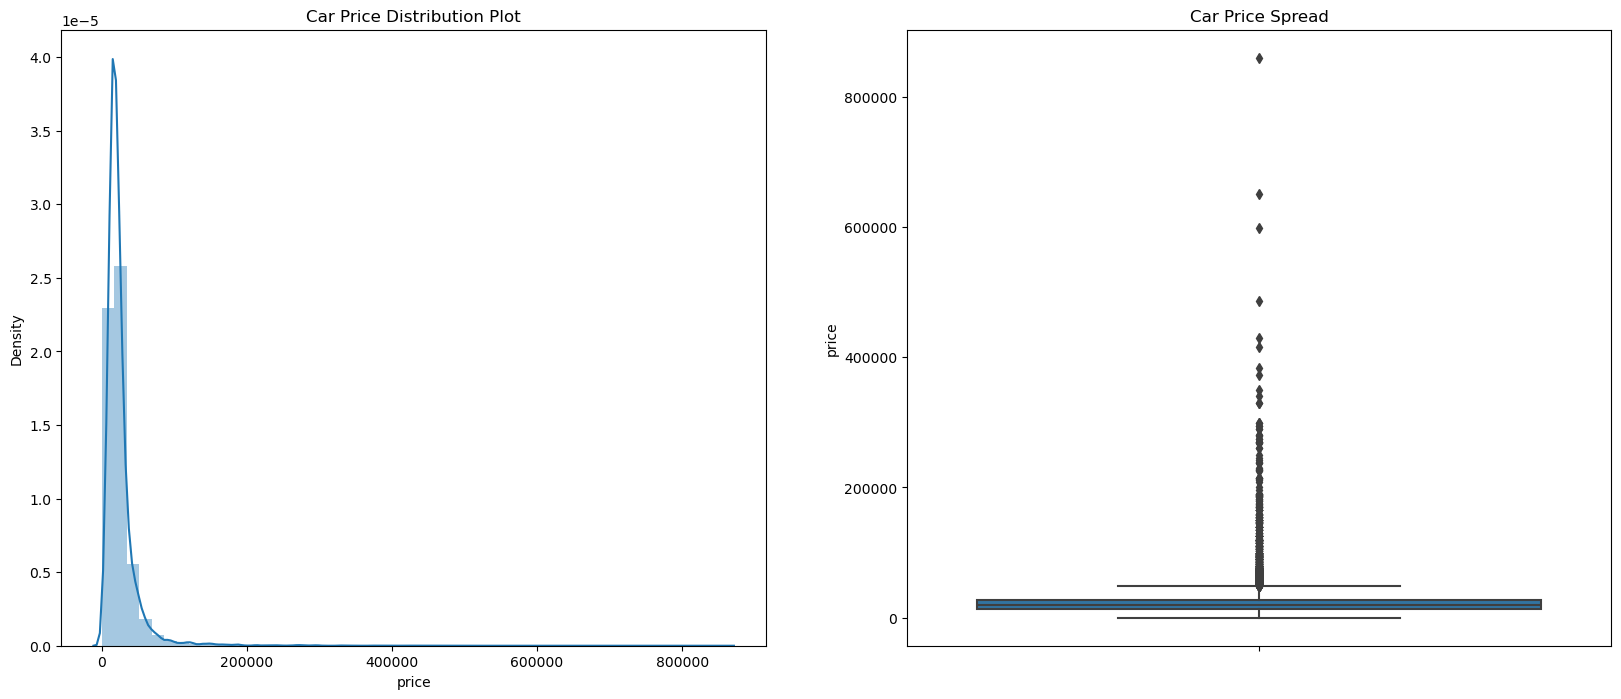

In [42]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(car_df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=car_df.price)

plt.show()

c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

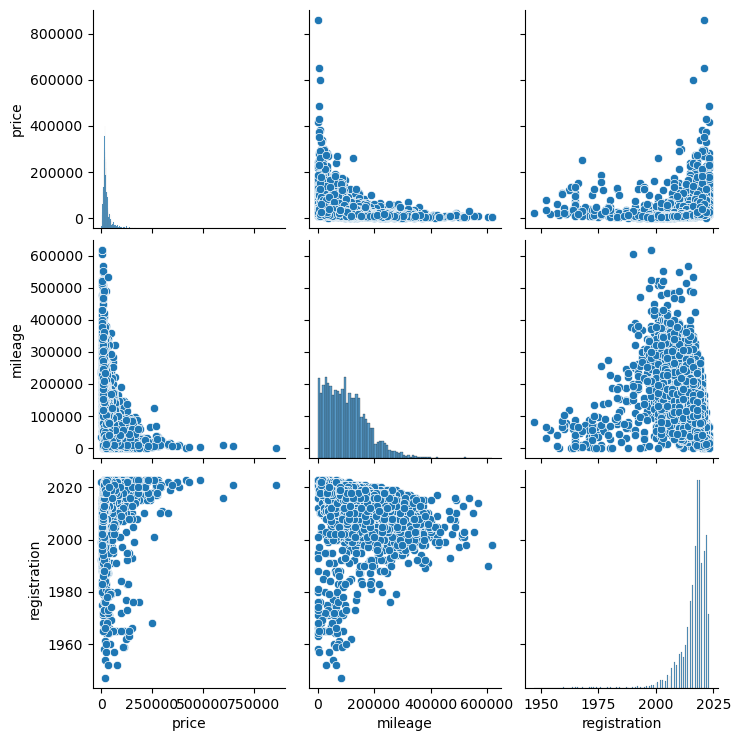

In [43]:
sns.pairplot(car_df)
plt.show()

In [44]:
car_df1=car_df

We downloaded the data from csv to new dataframes. We cleaned the dataframes by checking null values, removing duplicates, removing symbols and converting certain columns to numeric. Lastly we concacted the two dataframes and did additional cleaning.

### Feature Engineering

In [45]:
new_df=car_df1

In [46]:
columns_to_encode = ['country', 'make & model', 'fuel', 'website']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    new_df[column + '_encoded'] = label_encoder.fit_transform(new_df[column])

c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Elsio Miranda\AppData\Local\Temp\ipykernel_1244\1444529591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column + '_encoded'] = label_encoder.fit_transform(new_df[column])


In [47]:
new_df.drop(['fuel', 'make & model', 'country', 'website'], axis=1, inplace=True)

C:\Users\Elsio Miranda\AppData\Local\Temp\ipykernel_1244\1864716682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['fuel', 'make & model', 'country', 'website'], axis=1, inplace=True)


In [48]:
from sklearn.model_selection import train_test_split

features=new_df.drop(columns=["price"])
target= new_df["price"]

In [49]:
np.random.seed(0)
X_train, X_test, y_train, y_test=train_test_split(features, target)

### Modeling the data

In [50]:
gb_reg= GradientBoostingRegressor(max_depth=10,
                                 n_estimators=200,
                                 random_state=100)

gb_reg.fit(X_train, y_train)

print("r^2: ", gb_reg.score(X_test, y_test))

pred = gb_reg.predict(X_test)
print(pred)

c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse i

c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse i

r^2:  0.5785932164445637
[11305.9911589   9758.7843119  12526.51000376 ... 23041.67453004
 11168.96434911 24487.10622604]


In [51]:
print("RMSE: ",np.sqrt(mean_squared_error(pred, y_test))) 

RMSE:  16268.377464062583


c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


the model is quite bad, with r^2:0.57
RMSE is 16264
Will firstly try to normalize the features to see if it improves model

#### Normalization

In [52]:
normalizer=MinMaxScaler()

normalizer.fit(X_train)

X_train_normalized=normalizer.transform(X_train)
X_test_normalized=normalizer.transform(X_test)

c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse i

In [53]:
X_train_normalized=pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized=pd.DataFrame(X_test_normalized, columns=X_test.columns)

X_train_normalized.head()

,mileage,registration,country_encoded,make & model_encoded,fuel_encoded,website_encoded
0,0.052942,0.986842,1.0,0.286635,1.0,0.281261
1,0.197926,0.894737,1.0,0.709497,0.0,0.706010
2,0.007268,0.986842,1.0,0.585733,1.0,0.552855
3,0.337640,0.789474,1.0,0.000000,0.0,0.545232
4,0.050079,0.973684,1.0,0.750752,1.0,0.754271


In [65]:
gb_reg= GradientBoostingRegressor(max_depth=10,
                                 n_estimators=200,
                                 random_state=100)

gb_reg.fit(X_train_normalized, y_train)

pred = gb_reg.predict(X_test_normalized)

c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse i

c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [66]:
print("pred is ", pred)
print("r^2: ", gb_reg.score(X_test_normalized, y_test))
print("RMSE: ",np.sqrt(mean_squared_error(pred, y_test))) 

pred is  [11305.9911589   9758.7843119  12526.51000376 ... 23041.67453004
 11168.96434911 24487.10622604]
r^2:  0.5790630972315265
RMSE:  16259.305077987829


c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse i

Results have not changed. Will standardize the data and remove certain features

In [67]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14692 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   price                 14692 non-null  int32
 1   mileage               14692 non-null  int32
 2   registration          14692 non-null  int32
 3   country_encoded       14692 non-null  int32
 4   make & model_encoded  14692 non-null  int32
 5   fuel_encoded          14692 non-null  int32
 6   website_encoded       14692 non-null  int32
dtypes: int32(7)
memory usage: 516.5 KB


In [68]:
features=new_df[["make & model_encoded", "registration", "mileage","fuel_encoded"]]
target= new_df["price"]

In [69]:
np.random.seed(0)
X_train, X_test, y_train, y_test=train_test_split(features, target)

### Standardization

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse i

In [76]:
gb_reg= GradientBoostingRegressor(max_depth=10,
                                 n_estimators=200,
                                 random_state=100)

gb_reg.fit(X_train_scaled, y_train)

c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


GradientBoostingRegressor(max_depth=10, n_estimators=200, random_state=100)

In [77]:
# Make predictions on the standardized test set
price_pred = gb_reg.predict(X_test_scaled)

# Evaluate the model
print("prediction is ", price_pred)
print("r^2:", gb_reg.score(X_test_scaled, y_test))
print("RMSE: ",np.sqrt(mean_squared_error(price_pred, y_test))) 

prediction is  [ 7147.63693623  8169.33283808 13116.14876334 ... 22102.04086875
 10926.07508747 24831.64766428]
r^2: 0.43749798879520685
RMSE:  18795.570792844763


c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers

Stardardizing the features and removing some has worsened the model, with a r^2 score of 0.43 compared to the previous score of 0.57. This is not a good price prediction model. We will threfore obtain another dataset and test that model to obtain better results.

### New Dataset

In [78]:
data=pd.read_csv("new_dataset.csv")

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [81]:
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [82]:
data.CompanyName = data.CompanyName.str.lower()

def replace_name(a,b):
    data.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [83]:
data_model = data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                     'carlength','carwidth']]


In [84]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the data_model

data_model = dummies('fueltype',data_model)
data_model = dummies('aspiration',data_model)
data_model = dummies('carbody',data_model)
data_model = dummies('drivewheel',data_model)
data_model = dummies('enginetype',data_model)
data_model = dummies('cylindernumber',data_model)

In [85]:
features=data_model.drop(columns=["price"])
target= data_model["price"]

In [86]:
np.random.seed(0)
X_train, X_test, y_train, y_test=train_test_split(features, target, random_state=100)

In [87]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

X_test_scale = scaler.transform(X_test)

c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse i

### Building our model

In [88]:
gb_reg= GradientBoostingRegressor(max_depth=10,
                                 n_estimators=200,
                                 random_state=100)

gb_reg.fit(X_train_scale, y_train)

c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


GradientBoostingRegressor(max_depth=10, n_estimators=200, random_state=100)

### Scoring our model

In [89]:
# Make predictions on the standardized test set
prediction = gb_reg.predict(X_test_scale)

# Evaluate the model
print("prediction is ", prediction)
print("r^2:", gb_reg.score(X_test_scale, y_test))
print("RMSE: ",np.sqrt(mean_squared_error(prediction, y_test))) 

prediction is  [ 8085.65197567  8639.89291562 10594.99990445  9544.0201343
  7253.54316748 10035.69239126 18810.08452007 18755.7311187
 11591.89997422 19222.32755563 18295.41792039 18596.13434899
 12249.58183911 10596.34036126 34085.99108408  6547.62527403
  8074.65179651 15510.00003963 22019.36526438 14488.99998063
 11946.01573462 11946.01573462 34027.9999767   6125.17046792
 13884.67191072 13499.00002416 12799.43986449 26790.11824562
 16429.99996715  9038.51418951  5482.3632219  41314.99996228
 17074.99999411 22421.58961246 11900.00003061 10795.44471659
 11895.82839996 12776.70704121  6644.21167577 10155.8936152
 33544.33973165 11499.08891679  7808.10036732  7004.22505964
  6161.10968553  9600.08311846  6692.00038094  9279.01430968
  7775.00009212  8398.98113162  6094.26502556 13884.67191072]
r^2: 0.8468007714999432
RMSE:  3255.8882368645527


c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elsio Miranda\anaconda3\envs\final_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers

Our model has improved significantly and best option to make predictions with new data

### Pickling Model

In [90]:
w_model = f"gb_regressor_v1_{datetime.now().strftime('%Y%m%d%H%M%S')}"

In [91]:
with open(f"{w_model}.pkl", 'wb') as file:
    pickle.dump(gb_reg, file)

print(f"Gradient Boosting Regressor model '{w_model}' saved successfully.")

Gradient Boosting Regressor model 'gb_regressor_v1_20231209161845' saved successfully.


In [92]:
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
